In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

main_dir = 'C:\\Users\\Georgios\\Downloads\\clustering4ccerRevision\\journal\\new\\'
df = pd.read_csv(main_dir + 'schemaBasedAnalysisCleanFinalTimesNodes.csv', sep='|')
df

,Dataset,Nodes,Attribute Name,Similarity Measure,Duplicates Type,Valid Pairs,Domain,Average Characters D1,Average Tokens D1,Coverage D1,...,KRC Recall,KRC F-Measure,KRC Threshold,KRC Run-time,UMC Precision,UMC Recall,UMC F-Measure,UMC Threshold,UMC Run-time,BMC Configuration
0,Restaurants,2595,Name,Cosine Similarity,Scarce,2210,Restaurants,11,2,0.67,...,0.978,0.845,0.50,5,0.739,0.955,0.833,0.60,2,Right
1,Restaurants,2595,Name,Damerau Levenshtein,Scarce,292737,Restaurants,11,2,0.67,...,0.787,0.787,0.80,36,0.787,0.787,0.787,0.80,9,Right
2,Restaurants,2595,Name,Euclidean Distance,Scarce,286463,Restaurants,11,2,0.67,...,0.910,0.835,0.65,19,0.730,0.910,0.810,0.60,11,Right
3,Restaurants,2595,Name,Generalized Jaccard,Scarce,2210,Restaurants,11,2,0.67,...,0.966,0.835,0.25,2,0.730,0.944,0.824,0.40,2,Right
4,Restaurants,2595,Name,Jaro Similarity,Scarce,318143,Restaurants,11,2,0.67,...,0.899,0.821,0.80,21,0.736,0.910,0.814,0.80,4,Right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Movies,50797,Title,Overlap Coefficient,Balanced,18961432,Movies,18,3,1.00,...,0.395,0.542,0.55,1364,0.780,0.415,0.542,0.55,257,Right
203,Movies,50797,Title,q-grams Distance,Balanced,76181835,Movies,18,3,1.00,...,0.513,0.655,0.25,5129,0.878,0.515,0.649,0.35,777,Right
204,Movies,50797,Title,Simon White,Balanced,155889165,Movies,18,3,1.00,...,0.518,0.660,0.40,9035,0.896,0.521,0.659,0.50,1535,Right
205,Movies,50797,Title,Longest Common Subsequence,Balanced,373359861,Movies,18,3,1.00,...,0.463,0.601,0.10,546861,0.761,0.469,0.580,0.40,5135,Right


In [2]:
runtimes = pd.DataFrame()

for column in df:
    if (0 < column.find('Run-time')):
        runtimes[column] = df[column] / df['Valid Pairs'] 

runtimes.columns = ['CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

In [3]:
runtimes.describe().round(5)

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
count,207.00000,207.00000,207.00000,207.00000,207.00000,207.00000,207.00000,207.00000
mean,0.00008,0.00021,0.00357,0.95881,0.00012,0.00013,0.00019,0.00009
std,0.00057,0.00151,0.03047,9.52098,0.00089,0.00092,0.00060,0.00052
min,0.00000,0.00000,0.00001,0.00013,0.00000,0.00000,0.00000,0.00000
25%,0.00001,0.00001,0.00002,0.00056,0.00001,0.00001,0.00005,0.00001
50%,0.00001,0.00001,0.00006,0.00127,0.00001,0.00001,0.00007,0.00001
75%,0.00001,0.00002,0.00025,0.00551,0.00001,0.00002,0.00009,0.00002
max,0.00633,0.01504,0.32304,97.13222,0.01029,0.01188,0.00554,0.00554


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.4)
sns.set_style("white")

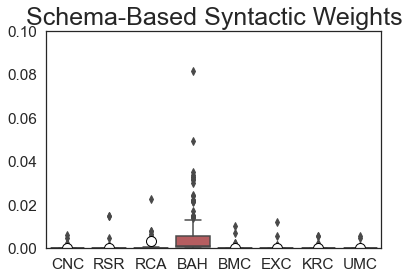

In [5]:
p = sns.boxplot(data = runtimes,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_title("Schema-Based Syntactic Weights", fontsize = 25)
plt.ylim(0, 0.1)
plt.savefig(main_dir + 'sbsyNormRT.eps', format='eps')

In [6]:
runtimes = pd.DataFrame()

for column in df:
    if (0 < column.find('Run-time')):
        runtimes[column] = df[column] / df['Nodes']

runtimes.columns = ['CNC', 'RSR', 'RCA', 'BAH', 'BMC', 'EXC', 'KRC',  'UMC']

In [13]:
runtimes.describe().round(3)

,CNC,RSR,RCA,BAH,BMC,EXC,KRC,UMC
count,207.000,207.000,207.000,207.000,207.000,207.000,207.000,207.000
mean,0.007,0.011,0.059,1.285,0.009,0.035,0.259,0.023
std,0.010,0.015,0.099,1.599,0.014,0.191,1.397,0.105
min,0.000,0.001,0.002,0.198,0.000,0.000,0.000,0.000
25%,0.001,0.003,0.017,0.237,0.002,0.002,0.009,0.002
50%,0.003,0.006,0.031,0.479,0.004,0.003,0.027,0.005
75%,0.009,0.013,0.056,2.284,0.011,0.010,0.075,0.015
max,0.050,0.099,0.487,5.082,0.109,1.920,12.465,1.354


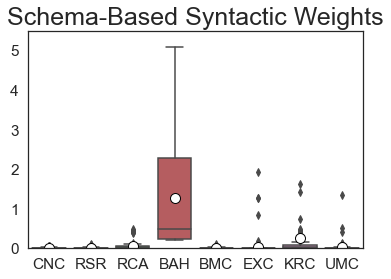

In [12]:
p = sns.boxplot(data = runtimes,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})
p.set_title("Schema-Based Syntactic Weights", fontsize = 25)
plt.ylim(0, 5.5)
plt.savefig(main_dir + 'sbsyNormRT.eps', format='eps')